### Instructions for Users:
Ensure that the Pokémon datasets (`pokemon_train.csv` and `pokemon_predict.csv`) are placed in the same directory as this notebook. If you don't have the datasets, you can download them from [link] or use your own data.

# Data Analytics and Mining 

## Classification with Decision Trees

### Overview:
This operation is related to decision tree classification.


import os
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

# Define the paths to the dataset
train_data_path = os.path.join('.', 'pokemon_train.csv')
test_data_path = os.path.join('.', 'pokemon_predict.csv')

# Load the training dataset from the CSV file
df = pd.read_csv(train_data_path, sep=',')

# Load the prediction dataset
df_predict = pd.read_csv(test_data_path, sep=',')


### Part 1: Building a Model with Only Numerical Attributes

In [9]:
# Importing Libaries
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

#### 1.1. Data import and cleaning
* Import the 'pokemon_train.csv' data as a Pandas dataframe.
* Check if there are any missing values in the data. Notice that there are missing values in one of the attributes. Count how many observations have missing values for this attribute.
* Since the number of missing values is high, it might not be a good idea to remove the observations with missing values (this would result in significant data loss). Instead, remove the attribute with missing values attribute from the dataframe. 
* In addition, remove the "Name" attribute since this is a unique identifier that has no prediction value.

In [12]:
import os
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

# Define the paths to the dataset
train_data_path = os.path.join('.', 'pokemon_train.csv')
test_data_path = os.path.join('.', 'pokemon_predict.csv')

# Load the training dataset from the CSV file
df = pd.read_csv(train_data_path, sep=',')

# Load the prediction dataset
df_predict = pd.read_csv(test_data_path, sep=',')


In [14]:
# Check for missing values in each column to identify any potential issues with the data
df.isnull().sum() # 370 missing values in Type_2 column

Name                  0
Type_1                0
Type_2              370
HP                    0
Attack                0
Defense               0
Speed                 0
isLegendary           0
Color                 0
Egg_Group_1           0
hasMegaEvolution      0
dtype: int64

In [16]:
# Since 'Type_2' has a large number of missing values, we drop it along with the 'Name' column (which isn't useful for prediction)
newdf = df.drop(columns = ['Name','Type_2'])
newdf

,Type_1,HP,Attack,Defense,Speed,isLegendary,Color,Egg_Group_1,hasMegaEvolution
0,Grass,45,49,49,45,No,Green,Monster,No
1,Grass,60,62,63,60,No,Green,Monster,No
2,Grass,80,82,83,80,No,Green,Monster,Yes
3,Fire,39,52,43,65,No,Red,Monster,No
4,Fire,58,64,58,80,No,Red,Monster,No
...,...,...,...,...,...,...,...,...,...
706,Flying,40,30,35,55,No,Purple,Flying,No
707,Flying,85,70,80,123,No,Purple,Flying,No
708,Fairy,126,131,95,99,Yes,Blue,Undiscovered,No
709,Psychic,80,110,60,70,Yes,Purple,Undiscovered,No


#### 1.2. Data preparation
* To build a classification model using the scikit learn package, we will need to split the data into two parts (input and target) as follows:
    * The 1st dataframe should only include the numerical attributes (4 of them) that we will use for prediction (i.e., inputs). Call this dataframe X. When selecting the numerical attributes, try to avoid hard-coding (You can use the "select.dtypes" method to subset the data with attributes of a particular type).
    * The 2nd part should only include the target attribute (i.e., hasMegaEvolution). Note that since there is only a single attribute, Pandas will automatically use the "Series" data type for this part. Call this series y.
* Check the unique values in the target attribute data set (y). Notice that the values (i.e., class labels) are "Yes" and "No", and are encoded as string type. 
* Most classification algorithms accept only integer type values. Therefore, re-code "Yes" values to 1 and "No" values to 0 in the same data set (y).
* Print out the unique y values after the re-coding.

##### Hints:
1. <span style="color: black; background: black; span:hover { color: white}">Re-coding is replacing an original value with a pre-specified different value. "replace" or "map" methods can help to achieve this task.</span>

In [29]:
# Select only the numerical columns from the cleaned dataset for our input features (X)
X = newdf.select_dtypes(include='number')

# Extract and convert the target column 'hasMegaEvolution' as the label (y) for prediction
y = newdf['hasMegaEvolution'].map({"Yes": 1, "No": 0})

# Ensure the resulting series is numeric
y = pd.to_numeric(y, downcast='integer')

#### 1.3. Building the model
* For many data mining operations in Python, we will use the scikit-learn library. Import the tree module from scikit-learn using the following statement: "from sklearn import tree".
* The tree module includes a decision tree algorithm in the DecisionTreeClassifier class. Instantiate an object from this class using the statement: "model1 = tree.DecisionTreeClassifier(criterion='entropy')
* Now, you can call the "fit" method from this object to build a decision tree model. To do this, you need to pass two parameters, the input attribute set (X) and the target attribute set (y). 
* See the following documentation for customizing the decision tree: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* Build a model using information gain, i.e. entropy as the purity function used to measure the quality of splits.

In [32]:
# Initialize the decision tree classifier with 'entropy' as the criterion, which uses information gain to split the nodes
model1 = tree.DecisionTreeClassifier(criterion='entropy')

In [34]:
# Train the decision tree model on the input features (X) and the target labels (y)
model1.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

#### 1.4. Observing the model
* Now, you will look at two ways of summarizing the workings of the tree model.
* 1. Feature Importances: "feature\_importances_" is a useful attribute to obtain normalized feature weights. These weights indicate how useful a feature is when an observation needs to be classified using this model. Create a dictionary of feature names and feature importance scores.
* 2. Visualization: To visualize the tree, use the plot_tree function in the imported tree package by passing your model into the function - e.g., tree.plot_tree(model1) 
* After visualizing the tree, you should notice that it is too complicated with many branches and levels. Try changing the model1 parameters (as you instantiate it as an object) to see if you can make the tree more compact and generalizable. See the documentation (the link given above) to understand more about possible parameters you can use for this purpose.

##### Hints:
1. <span style="color: black; span:hover { color: white}">For creating the feature importance dictionary, you can loop through X column names by using enumerate(X.columns)</span>

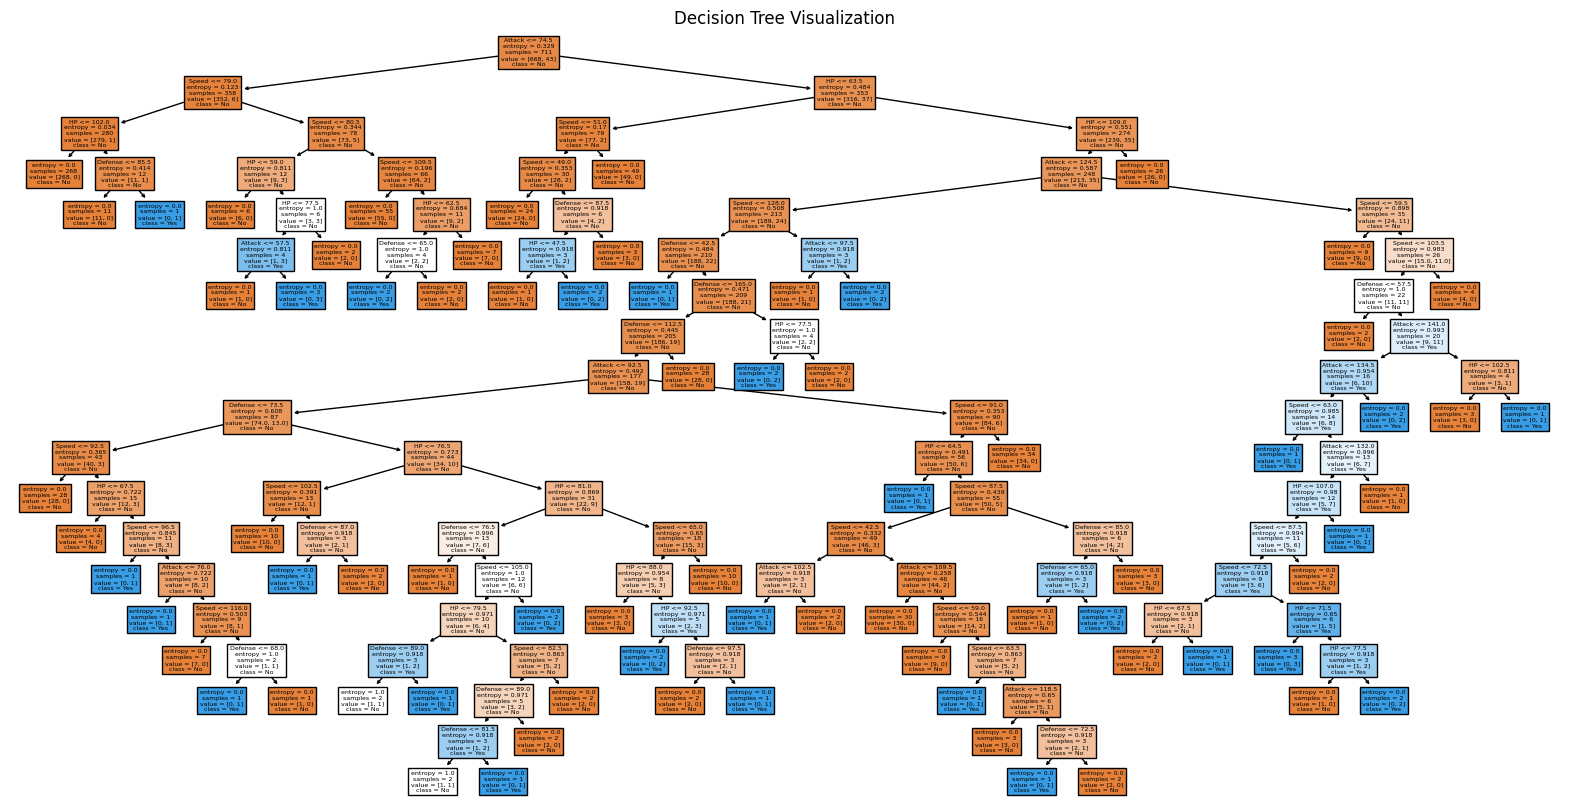

{'HP': 0.25568869766826097,
 'Attack': 0.20592328713884148,
 'Defense': 0.20841227794912826,
 'Speed': 0.3299757372437694}

In [37]:
# Define the decision tree classifier, using 'entropy' to measure the quality of splits (based on information gain)
model1 = tree.DecisionTreeClassifier(criterion='entropy')

# Train the decision tree model on the dataset, using input features (X) and target labels (y)
model1.fit(X, y)

# Calculate the feature importance - this shows how much each feature contributes to the decision-making process
# We create a dictionary that maps each feature name to its importance score
feature_importances = dict(zip(X.columns, model1.feature_importances_))

# Visualize the trained decision tree model to see the structure of decisions
plt.figure(figsize=(20, 10))  # Set the size of the visualization
tree.plot_tree(model1, feature_names=X.columns, filled=True, class_names=['No', 'Yes'])  # Generate the tree plot
plt.title("Decision Tree Visualization")  # Add a title for the plot
plt.show()  # Display the plot

# Display the feature importance scores for each feature in the dataset
feature_importances

### Part 2: Building a Model Using a Mixed Attribute Set

#### 2.1. Data pre-processing
* Now, you will use a combination of categorical and continuous attributes to build a new classification model.
* Note: For this question, use the original dataframe (but not the X from earlier) after removing the Name and Type_2 attributes. A good idea is to re-import the data, drop the two attributes again, and continue from there.
* <b>Important:</b> 
    * As of now (v.1.3.0), scikit-learn does not support categorical attributes to be directly entered into tree-based models. To circumvent this issue, we need to convert categorical attributes into numerical form using either label or one-hot encoding. The former option is applicable for ordinal categorical attributes (i.e., A > B > C, etc.), which is not the case for our data.
    * A majority of our categorical attributes are in nominal form, therefore we will need to perform "one-hot encoding". This encoding process creates a separate attribute for each possible value in each categorical attribute and codes them using a binary (1/0) integer format.
* Create the binary attributes for the nominal categorical attributes. You can use the OneHotEncoder function from scikit-learn or Pandas' get_dummies function for this purpose. After creating the binary attributes, remove the original nominal attributes from the data.
* For dichotomous categorical attributes in the data (Yes/No) -- i.e., isLegendary and hasMegaEvolution, you can directly re-code them onto themselves using 1/0 conversion.
* Complete these operations and print out the shape of the new data set. If done correctly, you should end up with 49 columns in the data.


##### Hints:
1. <span style="color: black; span:hover { color: white}">For one-hot encoding, you can use the "get_dummies" method in Pandas or OneHotEncoder in scikit-learn.</span>
1. <span style="color: black; span:hover { color: white}">Make sure that the original nominal attributes have been removed from the data after one-hot encoding.</span>

In [57]:
# Load the original Pokémon training dataset and remove the 'Name' and 'Type_2' columns
# 'Name' is irrelevant for predictions, and 'Type_2' has too many missing values
df_mixed = pd.read_csv('pokemon_train.csv')
df_mixed = df_mixed.drop(columns=['Name', 'Type_2'])

# Apply one-hot encoding to the categorical columns 'Type_1', 'Color', and 'Egg_Group_1'
# This converts categorical values into binary (0/1) indicators for each unique category
df_encoded = pd.get_dummies(df_mixed, columns=['Type_1', 'Color', 'Egg_Group_1'], drop_first=True)

# Convert the binary categorical columns 'isLegendary' and 'hasMegaEvolution' to numerical format (1 for 'Yes', 0 for 'No')
df_encoded['isLegendary'] = df_encoded['isLegendary'].map({'Yes': 1, 'No': 0})
df_encoded['hasMegaEvolution'] = df_encoded['hasMegaEvolution'].map({'Yes': 1, 'No': 0})

In [59]:
# Print the shape of the transformed dataset to ensure the encoding was successful
print(df_encoded.shape)  # We expect 711 rows and 49 columns after transformations

(711, 46)


#### 2.2. Data Preparation
* Split the data into two data sets -- one containing all the input attributes and the other containing only the target attribute (hasMegaEvolution). Call the first data set X and the second one y.

##### Hints:
1. <span style="; span:hover { color: white}">An easy way to copy all the attributes except the target one into a new dataframe is to make a copy of the existing data and then drop the target attribute from this copy.</span>

In [61]:
# Data Preparation - Splitting the dataset into input features (X) and target labels (y)
# 'X_mixed' will contain all the input attributes (features) except for 'hasMegaEvolution', which is what we want to predict
X_mixed = df_encoded.drop(columns=['hasMegaEvolution'])  # Input attributes

# 'y_mixed' will contain the target attribute 'hasMegaEvolution', which indicates whether a Pokémon can mega evolve (1 for Yes, 0 for No)
y_mixed = df_encoded['hasMegaEvolution']  # Target attribute

#### 2.3. Building and observing the model
* Build a decision tree model using the new data sets. You are free to tinker with parameters, etc.
* Use feature\_importances_ attribute to obtain the normalized feature weights for the new model.

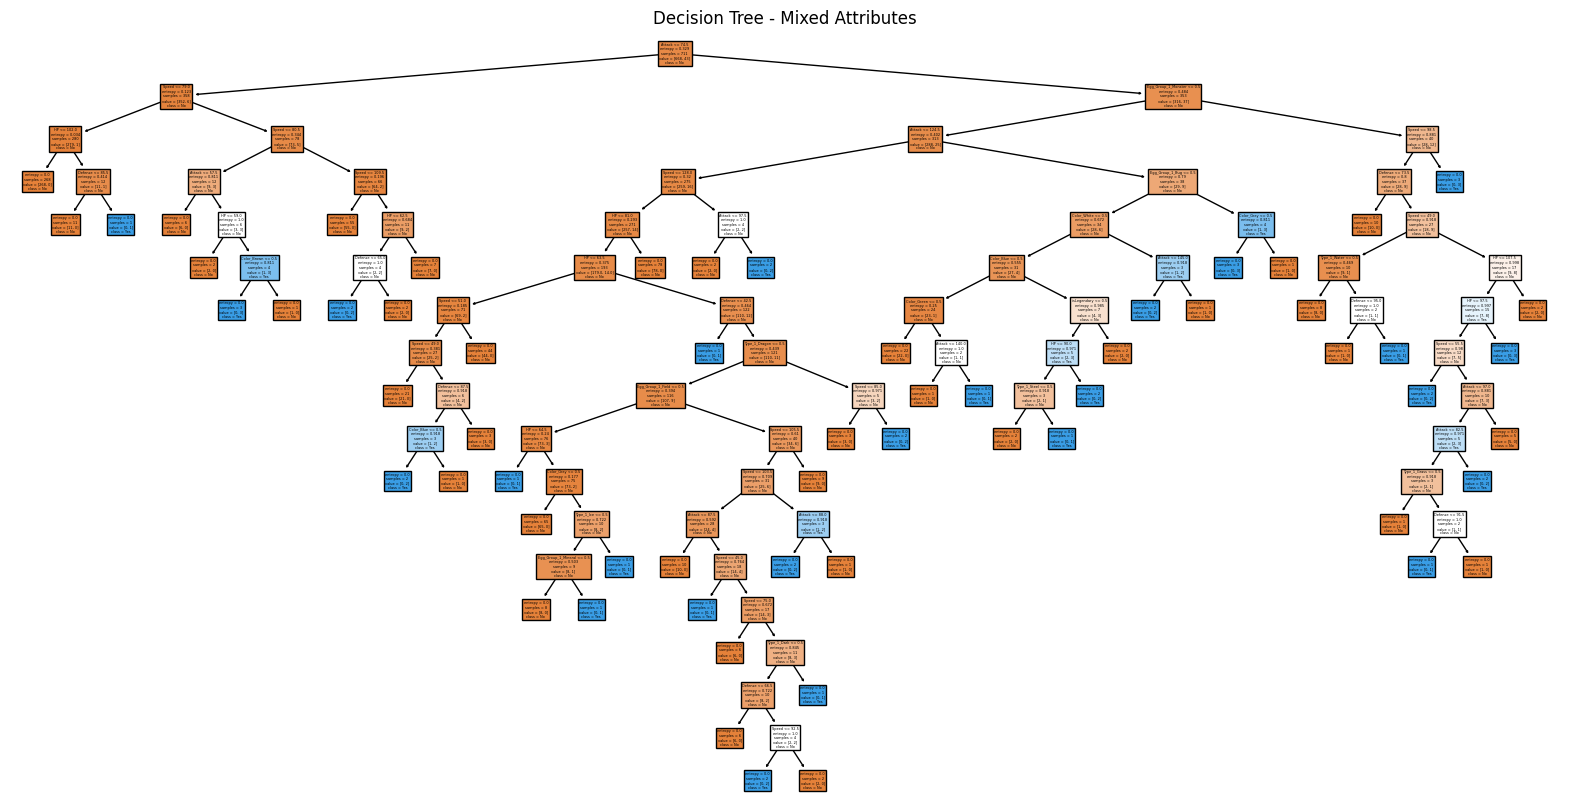

{'HP': 0.14049017008470951, 'Attack': 0.2182221033315454, 'Defense': 0.11599798219017331, 'Speed': 0.2538029885740699, 'isLegendary': 0.008719831810967789, 'Type_1_Dark': 0.008880983259311226, 'Type_1_Dragon': 0.011380547123266154, 'Type_1_Electric': 0.0, 'Type_1_Fairy': 0.0, 'Type_1_Fighting': 0.0, 'Type_1_Fire': 0.0, 'Type_1_Flying': 0.0, 'Type_1_Ghost': 0.0, 'Type_1_Grass': 0.00322379776302756, 'Type_1_Ground': 0.0, 'Type_1_Ice': 0.011487637434612187, 'Type_1_Normal': 0.0, 'Type_1_Poison': 0.0, 'Type_1_Psychic': 0.0, 'Type_1_Rock': 0.0, 'Type_1_Steel': 0.011764932048039094, 'Type_1_Water': 0.011487637434612194, 'Color_Blue': 0.030146952354373948, 'Color_Brown': 0.013858470806995508, 'Color_Green': 0.017070204337406216, 'Color_Grey': 0.03984456455945686, 'Color_Pink': 0.0, 'Color_Purple': 0.0, 'Color_Red': 0.0, 'Color_White': 0.012406053983792678, 'Color_Yellow': 0.0, 'Egg_Group_1_Bug': 0.016686538006445147, 'Egg_Group_1_Ditto': 0.0, 'Egg_Group_1_Dragon': 0.0, 'Egg_Group_1_Fairy': 0.

In [63]:
# Build and Train a Decision Tree Model Using the Mixed Attribute Set
# Define the decision tree model, using 'entropy' to measure the quality of splits, and set a random state for reproducibility
model_mixed = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model on the mixed attribute dataset, using the input features (X_mixed) and the target labels (y_mixed)
model_mixed.fit(X_mixed, y_mixed)

# Calculate the feature importances for the model, showing how much each feature contributes to the decision-making process
# Create a dictionary that maps each feature name to its importance score
feature_importances_mixed = dict(zip(X_mixed.columns, model_mixed.feature_importances_))

# Visualize the decision tree to understand its structure and decision-making process
plt.figure(figsize=(20, 10))  # Set the size of the visualization
tree.plot_tree(model_mixed, feature_names=X_mixed.columns, filled=True, class_names=['No', 'Yes'])  # Generate the tree plot
plt.title("Decision Tree - Mixed Attributes")  # Add a title to the plot
plt.show()  # Display the decision tree visualization

# Print out the feature importance scores to see which features had the most impact on the model's decisions
print(feature_importances_mixed)

### Part 3: Building and Applying the Model on to a Prediction Dataset
* For this question, your task is to predict the "hasMegaEvolution" values for a set of observations with missing target attribute values. These new observations are in a dataset named "pokemon_predict.csv". 
* The goal is to build a model from the "pokemon_train.csv" dataset and apply that on the "pokemon_predict.csv" dataset. Application of a model is easy -- all you need to do is to call the "predict" method in the model object and pass the prediction dataset into the method. However, if you try doing this as is, you will encounter errors. 
* The main problem is that your training data set has been transformed (hence the model uses transformed attributes), whereas the prediction data set is in its original form.
  * A seemingly easy solution to this problem is to one hot encode the prediction dataset (similar to training data set transformation). However, notice that this approach may not always work, because the prediction dataset is very likely to miss some categorical attribute values (because there are much fewer records in the prediction data compared to the training data). Accordingly, you need to find a way to mirror the data structure in both data sets.<br><br>
* A good general approach to perform prediction on an actual prediction data set involves:<br>
1) Combining training and prediction data sets at the beginning (while also ensuring that you are able to separate them later)<br>
2) Performing cleaning and one-hot encoding operations on the combined data set<br>
3) Separating the data into training and prediction after step 2; building the model from training, and finally applying it on prediction.<br><br>
* Perform the steps above and obtain the prediction results (the predict method should create a 1d array output). If there are any predicted "1" values (i.e., mega evolving pokemons), provide their names. You need to link the predicted array indices back to the original prediction data to obtain the names.
* Note: The approach described above would not work if data pre-processing task involved transformation operations such as standardization/normalization. This will be discussed later during the semester.

In [65]:
# Load both training and prediction datasets
# Load the training and prediction data from their respective CSV files
train_data = pd.read_csv('pokemon_train.csv')
predict_data = pd.read_csv('pokemon_predict.csv')

In [67]:
# Step 2: Add columns to distinguish the datasets and prepare the prediction data
# Add a new column to mark which rows are from the training data and which are from the prediction data
train_data['isTraining'] = 1
predict_data['isTraining'] = 0

In [69]:
# Add a placeholder column for the target 'hasMegaEvolution' in the prediction data (set to None since we need to predict this)
predict_data['hasMegaEvolution'] = None

# Combine the two datasets (training and prediction) into one for uniform cleaning and encoding
combined_data = pd.concat([train_data, predict_data], ignore_index=True)

In [71]:
# Data Cleaning and One-Hot Encoding
# Drop irrelevant columns ('Name') and columns with too many missing values ('Type_2')
combined_data = combined_data.drop(columns=['Name', 'Type_2'])

# Apply one-hot encoding to categorical columns ('Type_1', 'Color', 'Egg_Group_1')
combined_data_encoded = pd.get_dummies(combined_data, columns=['Type_1', 'Color', 'Egg_Group_1'], drop_first=True)

# Convert the binary categorical columns 'isLegendary' and 'hasMegaEvolution' to numerical format (1 for 'Yes', 0 for 'No')
combined_data_encoded['isLegendary'] = combined_data_encoded['isLegendary'].map({'Yes': 1, 'No': 0})
combined_data_encoded['hasMegaEvolution'] = combined_data_encoded['hasMegaEvolution'].map({'Yes': 1, 'No': 0})

In [73]:
# Split the data back into training and prediction sets after processing
# Separate the combined dataset back into training data and prediction data
train_encoded = combined_data_encoded[combined_data_encoded['isTraining'] == 1].drop(columns=['isTraining'])
predict_encoded = combined_data_encoded[combined_data_encoded['isTraining'] == 0].drop(columns=['isTraining', 'hasMegaEvolution'])

In [75]:
# Train the model on the re-processed training data
# Define input features (X) and target (y) for the training dataset
X_train_combined = train_encoded.drop(columns=['hasMegaEvolution'])
y_train_combined = train_encoded['hasMegaEvolution']

In [77]:
# Train a decision tree model using the combined data, with entropy as the criterion for information gain
model_combined = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
model_combined.fit(X_train_combined, y_train_combined)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [79]:
# Make predictions on the processed prediction data
# Use the trained model to predict 'hasMegaEvolution' values for the prediction dataset
predictions = model_combined.predict(predict_encoded)

In [81]:
# Identify Pokémon that are predicted to have the ability to mega evolve
# Match the predicted results with the original prediction dataset and display Pokémon names with a predicted value of 1 (mega evolving)
predict_data['Predicted_hasMegaEvolution'] = predictions
mega_evolving_pokemons = predict_data[predict_data['Predicted_hasMegaEvolution'] == 1]['Name']

In [83]:
# Display the names of Pokémon predicted to have mega evolution
mega_evolving_pokemons

0    Beedrill
3    Sharpedo
7    Gyarados
Name: Name, dtype: object